In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import cv2, tempfile, requests
import matplotlib.pyplot as plt
import mediapipe as mp
import IPython
from PIL import Image
from io import BytesIO

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hand = mp.solutions.hands


def show_img(img, dpi=150, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=dpi)
    ax.set_title( title, fontsize=16, color='black')
    ax.axis('off')
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return fig, ax

def decode_hands_result(hands_resutl):
    keypoint_index_name = [
        "手首1", "手首2", 
        "親指：付け根", "親指：第1関節", "親指：指先", 
        "人差指：付け根", "人差指：第2関節", "人差指：第1関節", "人差指：指先", 
        "中指：付け根", "中指：第2関節", "中指：第1関節", "中指：指先",
        "薬指：付け根", "薬指：第2関節", "薬指：第1関節", "薬指：指先",
        "小指：付け根", "小指：第2関節", "小指：第1関節", "小指：指先",
    ]

    for num, (hand_landmarks, handedness) in enumerate(zip(hands_resutl.multi_hand_landmarks,
                                                  hands_resutl.multi_handedness), start=1):
        print(f"左右：{handedness.classification[0].label[0]}")
        for i, keypoint in enumerate(hand_landmarks.landmark):
                print(keypoint_index_name[i], keypoint.x, keypoint.y, keypoint.z)
        print()
            
    return None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


左右：L
手首1 0.6780741214752197 0.6225166320800781 2.0602354311449744e-07
手首2 0.7059175968170166 0.6431221961975098 -0.004410273861140013
親指：付け根 0.7315430045127869 0.6568523645401001 -0.010635945945978165
親指：第1関節 0.7508487105369568 0.663802981376648 -0.016861187294125557
親指：指先 0.7676932215690613 0.6697322726249695 -0.023934384807944298
人差指：付け根 0.7327379584312439 0.6322169303894043 -0.025995926931500435
人差指：第2関節 0.7533518671989441 0.6436178684234619 -0.042401183396577835
人差指：第1関節 0.7666475176811218 0.6572308540344238 -0.05309748649597168
人差指：指先 0.7775334119796753 0.6720316410064697 -0.06038946285843849
中指：付け根 0.7206398248672485 0.6276370286941528 -0.03215578943490982
中指：第2関節 0.7354217767715454 0.6361967921257019 -0.049189548939466476
中指：第1関節 0.7432419657707214 0.6538917422294617 -0.057488951832056046
中指：指先 0.748274028301239 0.6719930171966553 -0.06322143971920013
薬指：付け根 0.7043765783309937 0.6273384094238281 -0.038077279925346375
薬指：第2関節 0.7144464254379272 0.6367374658584595 -0.0558114051818

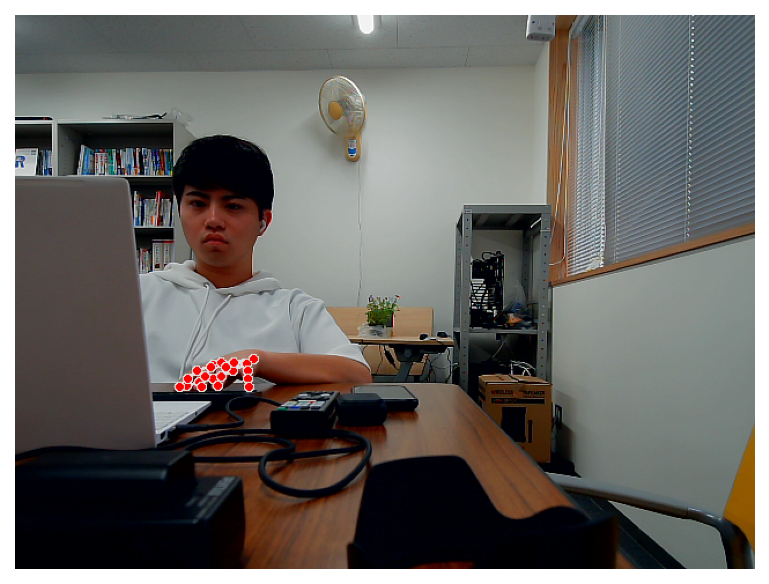

In [5]:
with mp_hand.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:

    try:
        ret, frame = cv2.VideoCapture(0).read()
    except:
        raise "Error"

    image = cv2.cvtColor(cv2.flip(frame, 1), cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    if results is not None:
        decode_hands_result(results)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    image, hand_landmarks, mp_hand.HAND_CONNECTIONS)

        show_img(cv2.flip(image, 1))

# リアルタイム描画

In [6]:
cap = cv2.VideoCapture(0)
assert cap.isOpened(), 'Could not open video device'

hands = mp_hand.Hands(  static_image_mode=True,
                        max_num_hands=2,
                        min_detection_confidence=0.5 )

try:
    while(True):
        ret, frame = cap.read()

        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = hands.process(frame)

            if results is not None:
                frame.flags.writeable = True
                image = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

                if results.multi_hand_landmarks:
                    for hand_landmarks in results.multi_hand_landmarks:
                        mp_drawing.draw_landmarks(
                            image, hand_landmarks, mp_hand.HAND_CONNECTIONS)
                        
                frame = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_RGB2BGR)

            f = BytesIO()
            Image.fromarray(frame).save(f, "jpeg")
            IPython.display.display(IPython.display.Image(data=f.getvalue()))
            
            IPython.display.clear_output(wait=True)

except KeyboardInterrupt:
    cap.release()
    print('Stream stopped')

Stream stopped
